<a href="https://colab.research.google.com/github/Gratisfo/MOCA/blob/main/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Short description of the project and dataset parameters

https://www.kaggle.com/datasets/rdoume/beerreviews

## Imports and Configuration

In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display
pd.options.display.max_columns = None

from scipy import stats

from scipy.stats import linregress
from scipy.stats import t
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Load Data

### Connecting and downloading data from Kaggle 

In [63]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [65]:
! cp kaggle.json ~/.kaggle/

In [66]:
! chmod 600 ~/.kaggle/kaggle.json

In [67]:
! kaggle datasets download rdoume/beerreviews

beerreviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [68]:
! unzip beerreviews.zip

Archive:  beerreviews.zip
replace beer_reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: beer_reviews.csv        


In [69]:
try:
    reviews = pd.read_csv('beer_reviews.csv')
    print('Total rows:', len(reviews))
    display(reviews.head())
except:
    print('Problems with loading the dataset')

Total rows: 1586614


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [70]:
reviews.shape

(1586614, 13)

## Exploratory Analysis

### Types of Data

In [71]:
# Convert 'object' to 'category' 
reviews[reviews.select_dtypes(['object']).columns] = reviews.\
                select_dtypes(['object']).apply(lambda x: x.astype('category'))

# Examine structure 
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   brewery_id          1586614 non-null  int64   
 1   brewery_name        1586599 non-null  category
 2   review_time         1586614 non-null  int64   
 3   review_overall      1586614 non-null  float64 
 4   review_aroma        1586614 non-null  float64 
 5   review_appearance   1586614 non-null  float64 
 6   review_profilename  1586266 non-null  category
 7   beer_style          1586614 non-null  category
 8   review_palate       1586614 non-null  float64 
 9   review_taste        1586614 non-null  float64 
 10  beer_name           1586614 non-null  category
 11  beer_abv            1518829 non-null  float64 
 12  beer_beerid         1586614 non-null  int64   
dtypes: category(4), float64(6), int64(3)
memory usage: 129.5 MB


The dataset now contains a mix of numeric and categorical variables

### Missing Data

####  Count Null Values

In [72]:
# Check for null values
print(reviews.isnull().sum())

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


#### Percent Null Values

In [73]:
# Percent of data missing `beer_abv` values
print("Percent Null Values of `beer_abv` column:", 
              round(67785 / 1586614 * 100, 2),"%")

Percent Null Values of `beer_abv` column: 4.27 %


#### Drop Null Values

In [74]:
# Drop null row values
reviews = reviews.dropna()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   brewery_id          1518478 non-null  int64   
 1   brewery_name        1518478 non-null  category
 2   review_time         1518478 non-null  int64   
 3   review_overall      1518478 non-null  float64 
 4   review_aroma        1518478 non-null  float64 
 5   review_appearance   1518478 non-null  float64 
 6   review_profilename  1518478 non-null  category
 7   beer_style          1518478 non-null  category
 8   review_palate       1518478 non-null  float64 
 9   review_taste        1518478 non-null  float64 
 10  beer_name           1518478 non-null  category
 11  beer_abv            1518478 non-null  float64 
 12  beer_beerid         1518478 non-null  int64   
dtypes: category(4), float64(6), int64(3)
memory usage: 135.7 MB


Removing all null values only impacts the size of the dataset by a little over 4%.

In [75]:
# Check for null values
print(reviews.isnull().sum())

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64


### Duplicate Data

In [76]:
# Counting unqiueness by Brewery/Company
print('No of unique brewery by name:', reviews.brewery_name.nunique())
print('No of unique brewery by ids:',reviews.brewery_id.nunique())

No of unique brewery by name: 5155
No of unique brewery by ids: 5230


In [77]:
# Counting uniqueness by Beer
print('No of unique beer by name:', reviews.beer_name.nunique())
print('No of unique beer by ids:',reviews.beer_beerid.nunique())

No of unique beer by name: 44075
No of unique beer by ids: 49000


In [78]:
# Counting number of users,reviewed the beer
print('No of unique users, reviewing the given beers: ', 
                    reviews.review_profilename.nunique())

No of unique users, reviewing the given beers:  32908


If a user has rated the same beer more than once, then only keep their highest rating

In [79]:
# Sort by user overall rating first
reviews = reviews.sort_values('review_overall', ascending=False)

# Keep the highest rating from each user and drop the rest 
reviews = reviews.drop_duplicates(subset= ['review_profilename','beer_name'], 
                                  keep='first')

# Peep structure
reviews.info()

# Percent of data that are duplicates
print("Percent of Duplicate Values:", 
                          round((1518478 - 1496263)/ 1518478 * 100, 2),"%")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496263 entries, 1586613 to 39648
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   brewery_id          1496263 non-null  int64   
 1   brewery_name        1496263 non-null  category
 2   review_time         1496263 non-null  int64   
 3   review_overall      1496263 non-null  float64 
 4   review_aroma        1496263 non-null  float64 
 5   review_appearance   1496263 non-null  float64 
 6   review_profilename  1496263 non-null  category
 7   beer_style          1496263 non-null  category
 8   review_palate       1496263 non-null  float64 
 9   review_taste        1496263 non-null  float64 
 10  beer_name           1496263 non-null  category
 11  beer_abv            1496263 non-null  float64 
 12  beer_beerid         1496263 non-null  int64   
dtypes: category(4), float64(6), int64(3)
memory usage: 133.7 MB
Percent of Duplicate Values: 1.46 %


### Overview of Numeric Features

In [80]:
round(reviews.describe())

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1496263.0,1.496263e+06,1496263.0,1496263.0,1496263.0,1496263.0,1496263.0,1496263.0,1496263.0
mean,3069.0,1.225547e+09,4.0,4.0,4.0,4.0,4.0,7.0,21445.0
std,5542.0,7.574836e+07,1.0,1.0,1.0,1.0,1.0,2.0,21801.0
min,1.0,8.843904e+08,0.0,1.0,0.0,1.0,1.0,0.0,5.0
25%,141.0,1.175877e+09,4.0,4.0,4.0,4.0,4.0,5.0,1655.0
50%,413.0,1.240543e+09,4.0,4.0,4.0,4.0,4.0,6.0,12962.0
75%,2250.0,1.289228e+09,4.0,4.0,4.0,4.0,4.0,8.0,39286.0
max,28003.0,1.326285e+09,5.0,5.0,5.0,5.0,5.0,58.0,77316.0


In the dataset, review time column has datatype of int64, converting it in form of datetime format

In [81]:
reviews.review_time = pd.to_datetime(reviews.review_time,unit = 's')
reviews.dtypes

brewery_id                     int64
brewery_name                category
review_time           datetime64[ns]
review_overall               float64
review_aroma                 float64
review_appearance            float64
review_profilename          category
beer_style                  category
review_palate                float64
review_taste                 float64
beer_name                   category
beer_abv                     float64
beer_beerid                    int64
dtype: object

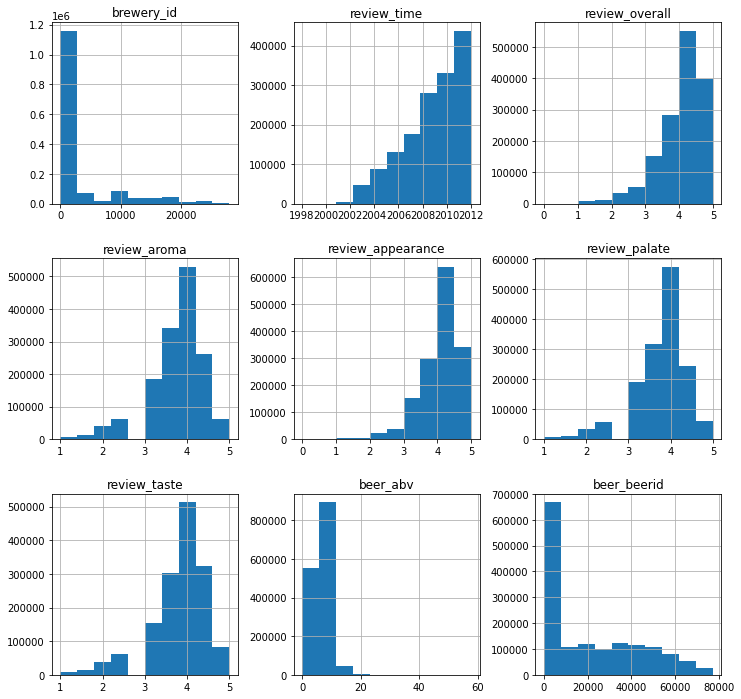

In [82]:
# Histogram of all numeric features
reviews.hist(figsize=(12,12))
plt.show()

Also note the existence of ratings which have a value of 0 in the `review_overall` & `review_appearance` columns.

###  Ratings of 0

Since ratings are on a scale of 1-5, any values in review variables that are less than 1 are not suitable for analysis.

In [83]:
# Review scores of >= 1
reviews = reviews[(reviews['review_overall'] >= 1) | \
        (reviews['review_appearance'] >= 1)]

# Check it out
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496256 entries, 1586613 to 1301769
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   brewery_id          1496256 non-null  int64         
 1   brewery_name        1496256 non-null  category      
 2   review_time         1496256 non-null  datetime64[ns]
 3   review_overall      1496256 non-null  float64       
 4   review_aroma        1496256 non-null  float64       
 5   review_appearance   1496256 non-null  float64       
 6   review_profilename  1496256 non-null  category      
 7   beer_style          1496256 non-null  category      
 8   review_palate       1496256 non-null  float64       
 9   review_taste        1496256 non-null  float64       
 10  beer_name           1496256 non-null  category      
 11  beer_abv            1496256 non-null  float64       
 12  beer_beerid         1496256 non-null  int64         
dtypes: cat

There were only seven reviews with ratings of less than 1 here which is basically negligible. However, it's always a good idea to check for numbers which don't make sense in your dataset.

### Remove Strings

Split `brewery_name` using a delimiter and only keep strings before the split.

In [84]:
# Split after / & keep only first string
reviews['brewery_name'] = reviews['brewery_name'].str.split(' / ').str[0]

### Visualizations and some more numerical features

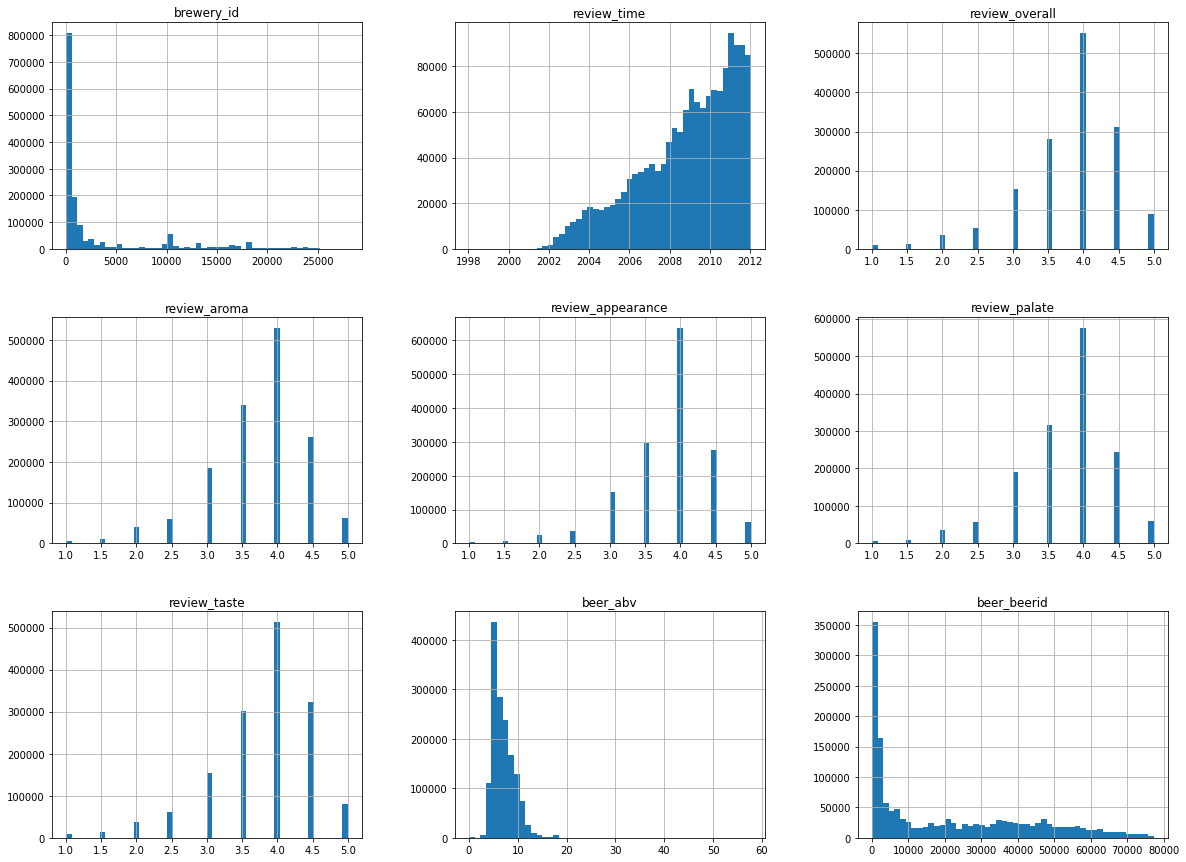

In [85]:
# Plot histograms of numerical columns to understand 
# the distribution of the data one again. 
reviews.hist(bins=50, figsize=(20,15))
plt.show()

In [86]:
# Check the number of unique values in each categorical column
#  using the nunique() function.
reviews.select_dtypes(include=["object"]).nunique()

brewery_name    5139
dtype: int64

In [87]:
# Use the groupby() function and the mean() function 
# to understand the relationship between different columns
reviews.groupby('beer_style').mean()

,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
beer_style,,,,,,,,
Altbier,2868.090744,3.832285,3.634997,3.815366,3.721127,3.756711,5.831379,20039.026706
American Adjunct Lager,1288.271006,3.011274,2.478100,2.785612,2.736271,2.686579,4.861251,7004.168186
American Amber / Red Ale,3426.229798,3.803639,3.652608,3.828604,3.677015,3.720514,6.032006,20232.255310
American Amber / Red Lager,5778.520611,3.577351,3.220623,3.533641,3.362473,3.384921,4.962586,14521.618692
American Barleywine,2097.337598,3.899808,4.022152,4.039846,3.999481,4.046090,10.705325,22934.142863
...,...,...,...,...,...,...,...,...
Vienna Lager,1604.533121,3.777764,3.440921,3.706747,3.570895,3.615771,5.016758,7061.460389
Weizenbock,1223.696580,4.011327,4.048682,4.012851,3.993248,4.080320,8.134365,26636.196689
Wheatwine,2498.282310,3.820578,3.977011,3.906784,3.946454,3.985282,10.668405,40098.349593


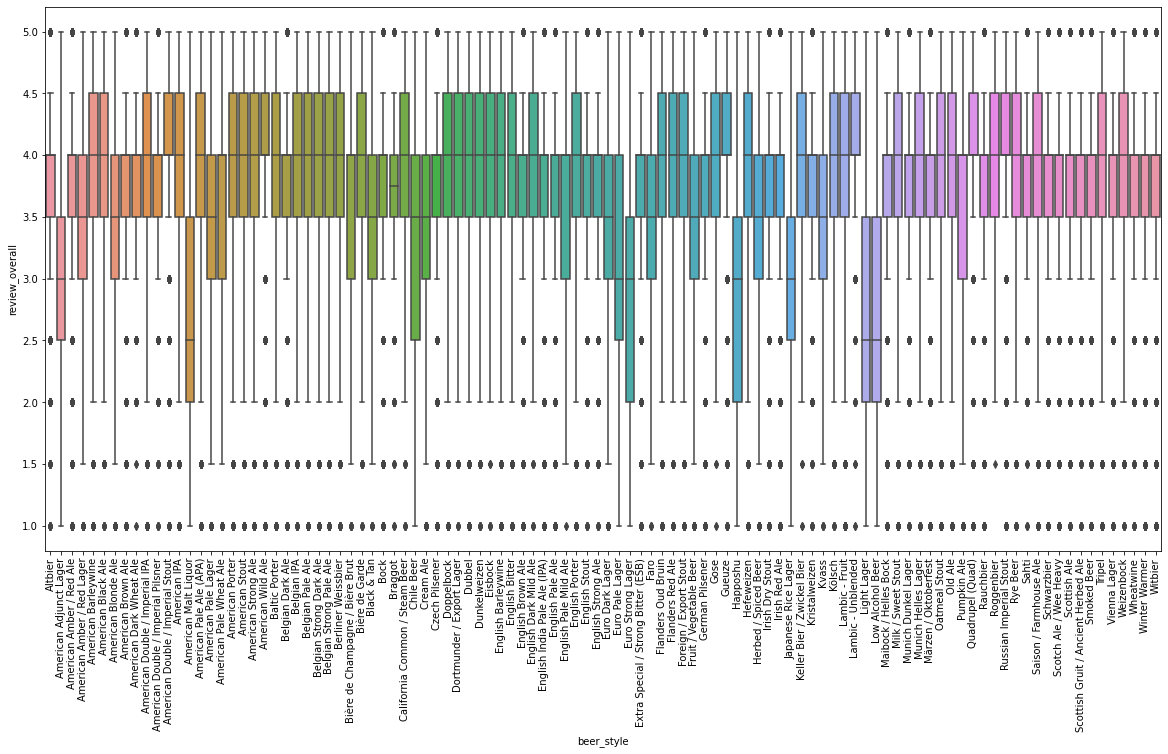

In [88]:
# Create a box plot to see the distribution of ratings for different beer styles
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x='beer_style', y='review_overall', data=reviews, ax=ax)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

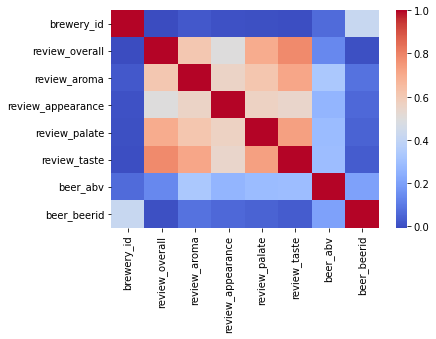

In [89]:
# Heatmap correlation matrix
corr = reviews.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')
plt.show()

## Hypothesis

### There is a relationship between the overall rating of a beer and the number of reviews it has received. Specifically, beers with more reviews may have a higher average rating.


In [90]:
#Use the groupby() function to group the data by beer name and 
# calculate the mean overall rating and the count of reviews for each beer.
data_grouped = reviews.groupby('beer_name')['review_overall'].\
                        agg(['mean', 'count'])

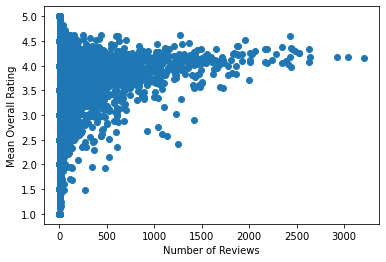

In [91]:
plt.scatter(data_grouped['count'], data_grouped['mean'])
plt.xlabel('Number of Reviews')
plt.ylabel('Mean Overall Rating')
plt.show()

In [92]:
data_grouped

,mean,count
beer_name,,
! (Old Ale),4.000000,1
"""100""",4.000000,5
"""100"" Pale Ale",4.000000,1
"""12"" Belgian Golden Strong Ale",4.000000,2
"""33"" Export",3.000000,3
...,...,...
Žamberecký Kanec Imperial Stout,3.750000,2
Ω-naught (Omeganaught),4.166667,3
“Chewy” Double IPA,2.500000,1


In [93]:
# Use the pearsonr() function from the scipy.stats library to calculate 
# the correlation coefficient between the mean overall rating and the count of reviews.
data_grouped = data_grouped.replace([np.inf, -np.inf], np.nan)
data_grouped = data_grouped.dropna()
corr, p_value = pearsonr(data_grouped['count'], data_grouped['mean'])
print("Correlation coefficient: ", corr)

Correlation coefficient:  0.07016831370879789


In [94]:
# Perform a linear regression to see the relationship 
# between overall rating and number of reviews.
X = data_grouped['count'].values.reshape(-1,1)
y = data_grouped['mean'].values
reg = LinearRegression().fit(X, y)

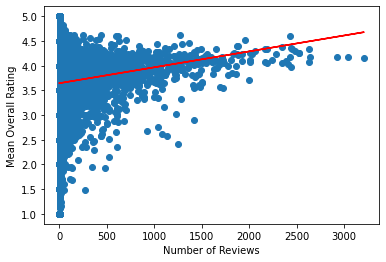

In [95]:
plt.scatter(data_grouped['count'], data_grouped['mean'])
plt.plot(X, reg.predict(X), color='red')
plt.xlabel('Number of Reviews')
plt.ylabel('Mean Overall Rating')
plt.show()

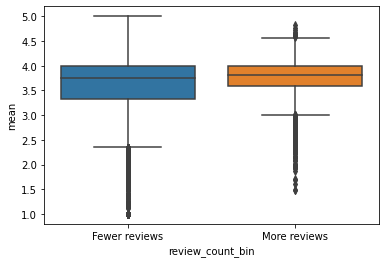

In [96]:
data_grouped['review_count_bin'] = 'Fewer reviews'
data_grouped.loc[data_grouped['count'] > data_grouped['count'].mean(),
                                  'review_count_bin'] = 'More reviews'
sns.boxplot(x='review_count_bin', y='mean', data=data_grouped)
plt.show()

### The beer style is related to the overall rating of a beer. For example, certain beer styles such as stouts and IPAs may have higher overall ratings compared to other styles.


F_onewayResult(statistic=nan, pvalue=nan)

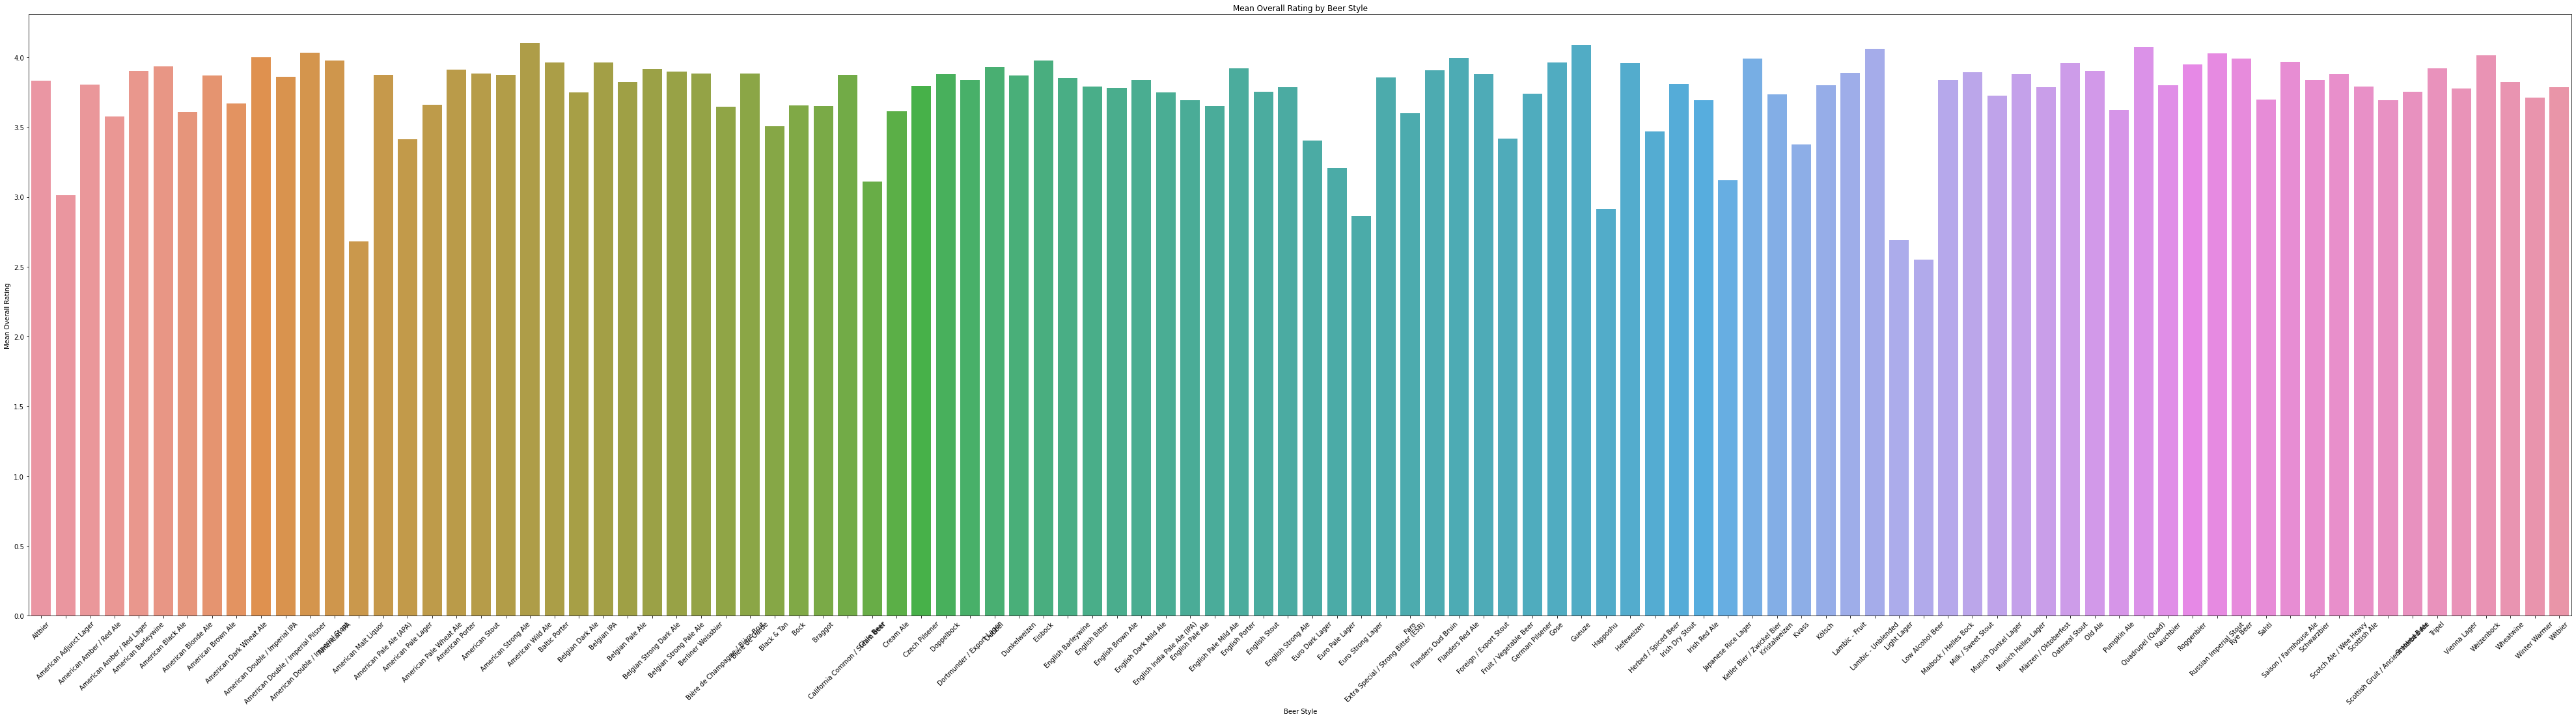

In [97]:
# Read the reviews.csv file into a pandas dataframe
df = reviews.copy()

# group the data by beer style and calculate the mean overall rating for each group
mean_overall_rating = df.groupby('beer_style')['review_overall'].mean()

# Use seaborn library to create a barplot to visualize the relationship 
# between beer style and overall rating
plt.figure(figsize=(70,17))
sns.barplot(mean_overall_rating.index, mean_overall_rating.values)
plt.xlabel('Beer Style')
plt.ylabel('Mean Overall Rating')
plt.title('Mean Overall Rating by Beer Style')
plt.xticks(rotation=45)

# Use ANOVA to examine the relationship between the overall rating 
# and beer style
stats.f_oneway(df[df['beer_style'] == 'IPA']['review_overall'],
              df[df['beer_style'] == 'Stout']['review_overall'],
              df[df['beer_style'] == 'Pilsner']['review_overall'],
              df[df['beer_style'] == 'Lager']['review_overall'],
              df[df['beer_style'] == 'Ale']['review_overall'])


This will provide the F-value and p-value of the ANOVA test. If the p-value is less than the significance level (usually 0.05), it can be concluded that there is a significant difference in the overall rating among different beer styles.

In [98]:
X = reviews['beer_style']
Y = reviews['review_overall']

In [99]:
X = pd.get_dummies(X, columns=['beer_style'])

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [101]:
model = LinearRegression()

In [102]:
model.fit(X_train, y_train)

LinearRegression()

In [103]:
y_pred = model.predict(X_test)

# print(model.coef_)

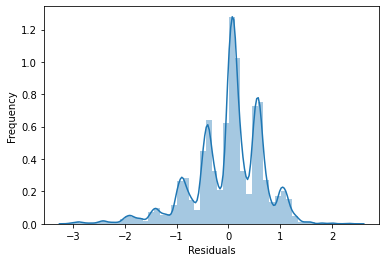

In [104]:
results = y_test - y_pred
sns.distplot(results)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### There is a relationship between the alcohol by volume (ABV) of a beer and its overall rating. Beers with a higher ABV may be rated more highly, on average, than beers with a lower ABV.


In [105]:
# Compute the correlation coefficient between ABV and overall rating
corr, p_value = pearsonr(reviews['beer_abv'], reviews['review_overall'])
print("Correlation coefficient: ", corr)

Correlation coefficient:  0.1378121173904444


In [106]:
#There is a positive correlation between ABV and overall rating.

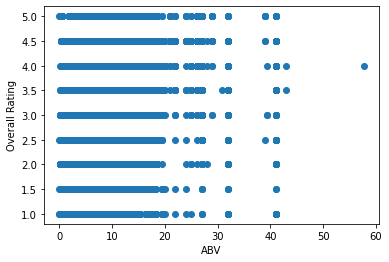

In [107]:
# Create a scatter plot of the data
plt.scatter(reviews['beer_abv'], reviews['review_overall'])
plt.xlabel('ABV')
plt.ylabel('Overall Rating')
plt.show()

In [108]:
X = reviews[['beer_abv']]
y = reviews['review_overall']

reg = LinearRegression()

# Fit the linear regression model to the data
reg.fit(X, y)

# Make predictions
y_pred = reg.predict(X)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error: ", mse)

# Print the coefficients
print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)

# R-squared value
print("R-Squared: ", reg.score(X, y))

Mean Squared Error:  0.50514386089365
Coefficients:  [0.04252188]
Intercept:  3.525944368607942
R-Squared:  0.018992179699638956


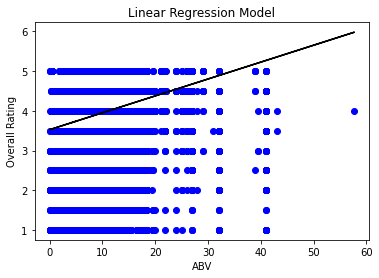

In [109]:
plt.scatter(X, y, color='b')
plt.plot(X, y_pred, color='k')
plt.xlabel('ABV')
plt.ylabel('Overall Rating')
plt.title('Linear Regression Model')
plt.show()

There is a clear correlation between ABV and overall rating.